<a href="https://colab.research.google.com/github/kothawadegs/Geospatial-Data-Processing/blob/master/Elevation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the Python library: elevation

In [0]:
import elevation

In [3]:
#!pip install elevation

     |████████████████████████████████| 71kB 3.7MB/s 
ERROR: pip-tools 4.5.1 has requirement click>=7, but you'll have click 6.7 which is incompatible.
  Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2


In [0]:
#importing os, gdal
import os
import gdal

In [7]:
#get current working directory path 
base_dir = os.getcwd()
base_dir

'/content'

In [0]:
#Bhopal Bounding box
bbox = (77.2741, 23.1662, 77.4558, 23.3001 ) 
city = 'bhopal'

In [0]:
# defining the path of the elevation file
elevation_file = base_dir + '/dem.tif'

In [0]:
# Defining the path of the slope file
slope_file = base_dir + '/slope.tif'

In [11]:
elevation_file

'/content/dem.tif'

In [26]:
slope_file

'/content/slope.tif'

In [0]:
# get digital elevation model file
def download_dem(bbox,outFileName):
  elevation.clip(bounds=bbox, output=outFileName)
  elevation.clean()

In [0]:
# Get SRTM data
download_dem(bbox, elevation_file)

In [14]:
ls

dem.tif  sample_data/


In [0]:
# what are we going to do with this DEM? 
# function to extract the slope using the DEM file
def calculate_slope(elevation_file, slope_file):
  command_name = "gdaldem slope -p " +elevation_file+" "+slope_file
  os.system(str(command_name))

In [0]:
# Calculate slope using the DEM file
calculate_slope(elevation_file, slope_file)

In [0]:
# Importing numpy 
import numpy as np

In [0]:
temp_band = gdal.Open(elevation_file)

In [24]:
type(temp_band)

osgeo.gdal.Dataset

In [0]:
# defining a fucntion to read the data as array
def read_tif_asarray(band):
  temp_band = gdal.Open(band)
  array_band = temp_band.ReadAsArray()
  array_band_float = np.array(array_band, dtype=float)
  return array_band_float, temp_band

In [0]:
slope, slope_a = read_tif_asarray(slope_file)

In [29]:
slope

array([[ -9999.     ,  -9999.     ,  -9999.     , ...,  -9999.     ,
         -9999.     ,  -9999.     ],
       [ -9999.     , 371079.5    , 586728.1875 , ..., 484664.84375,
        450000.     ,  -9999.     ],
       [ -9999.     , 387104.625  , 229455.875  , ..., 402492.25   ,
        387104.625  ,  -9999.     ],
       ...,
       [ -9999.     , 509116.875  , 569210.     , ..., 463303.34375,
        655209.875  ,  -9999.     ],
       [ -9999.     , 229455.875  , 180000.     , ..., 458911.75   ,
        569210.     ,  -9999.     ],
       [ -9999.     ,  -9999.     ,  -9999.     , ...,  -9999.     ,
         -9999.     ,  -9999.     ]])

In [30]:
slope_a

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f7de2475780> >

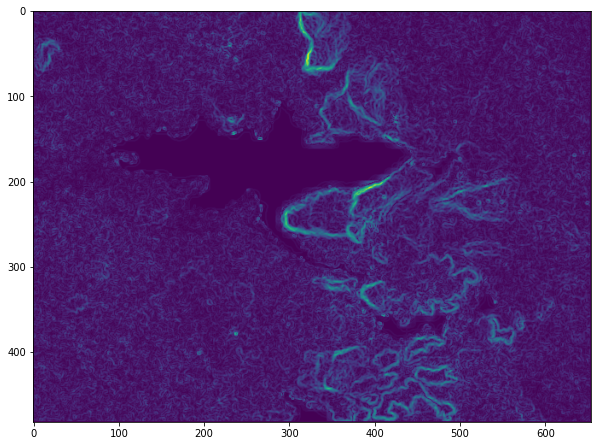

In [32]:
# Visualization of the data which we just processed
import matplotlib.pyplot as plt
% matplotlib inline
plt.figure(figsize= (10,10))
plt.imshow(slope)